#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Missing Values- Feature Engineering- Day 1

#### Lifecycle of a Data Science Projects
1. Data Collection Statergy ---> from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering ---> Handling Missing Values

    **Why are their Missing values??** 
        1. They hesitate to put down the information
        2. Survey informations are not that valid
        3. Men--salary
        4. Women---age
        5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### What are the different types of Missing Data?

1. ##### Missing Completely at Random (MCAR):

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


2. ##### Missing Data Not At Random (MNAR): Systematic missing Values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

3. ##### Missing At Random(MAR)

In [2]:
import pandas as pd

df=pd.read_csv('titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
nan = df.isnull().sum()
nan[nan>0].sort_values(ascending = False)

Cabin       687
Age         177
Embarked      2
dtype: int64

In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


###### Here Embarked does not have any relationship with any other feature

In [8]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [13]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

###### Here cabin has relationship with age. 
###### By above point, we can say that 87% people survived data is not missing and 60% people survived when data is missing.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### All the techniques of handling Missing values

- ### Numerical
    1. ***Mean/ Median/Mode replacement***
    2. ***Random Sample Imputation***
    3. ***Capturing NAN values with a new feature***
    4. ***End of Distribution imputation***
    5. ***Arbitrary imputation***
    
- ### Categorical
    6. ***Frequent categories imputation***
    7. ***Adding a variable to capture NAN***
    8. ***Replacing NaN with new category***


#### 1. Mean/ MEdian /Mode imputation

When should we apply?

Mean/median imputation has the assumption that the data are missing ***completely at random(MCAR)***. We solve this by replacing the NAN with the most frequent occurance of the variables

In [7]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [10]:
median=df.Age.median()

impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [11]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


We can see, variance can differ little in median imputation.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

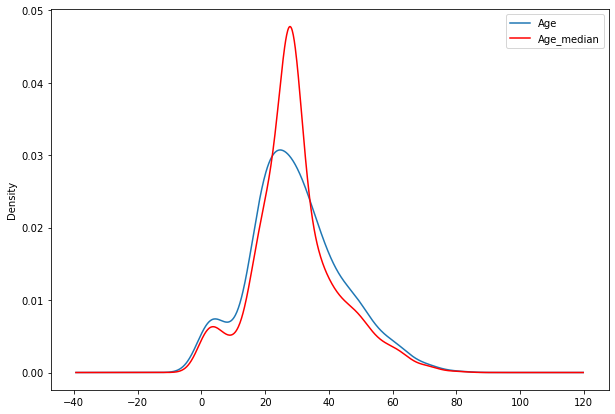

In [15]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages And Disadvantages of Mean/Median Imputation
##### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

##### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation


### 2. Random Sample Imputation

##### Aim:

Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

##### When should it be used?

It assumes that the data are missing ***completely at random(MCAR)***

In [114]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [115]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [116]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [117]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [118]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [119]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [120]:
median=df.Age.median()
print(median)

impute_nan(df,"Age",median)
df.head()

28.0


,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


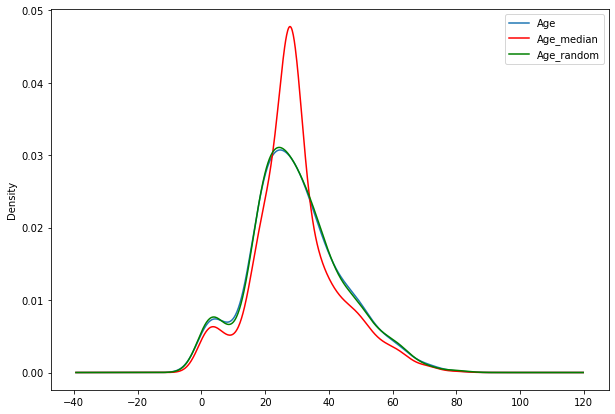

In [122]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

We can see, variance are not differing in random imputation.

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

### 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [131]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [132]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [133]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


###### Advantages
1. Easy to implement
2. Captures the importance of missing values

###### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

### 4 . End of Distribution imputation

In [147]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


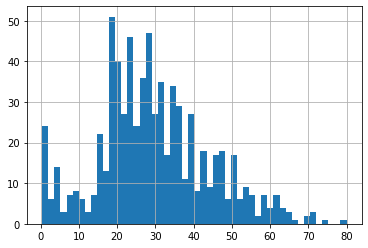

In [148]:
df.Age.hist(bins=50)

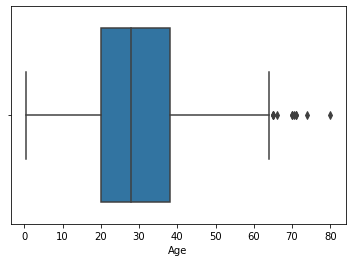

In [149]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [150]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [151]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    
impute_nan(df,'Age',df.Age.median(),extreme)
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


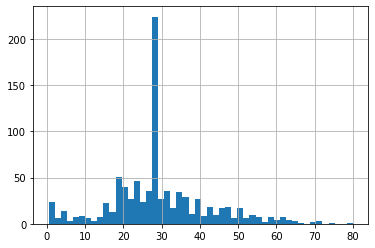

In [154]:
df['Age'].hist(bins=50)

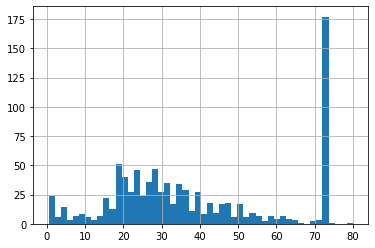

In [155]:
df['Age_end_distribution'].hist(bins=50)

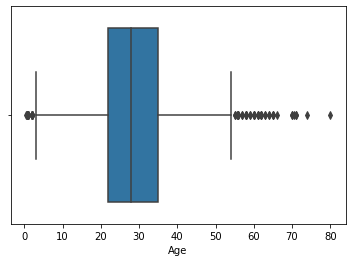

In [156]:
sns.boxplot('Age',data=df)

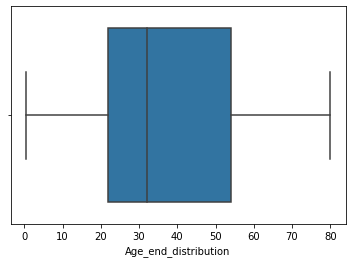

In [157]:
sns.boxplot('Age_end_distribution',data=df)

### 5. Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

In [158]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [160]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [161]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    
impute_nan(df, 'Age')
df.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


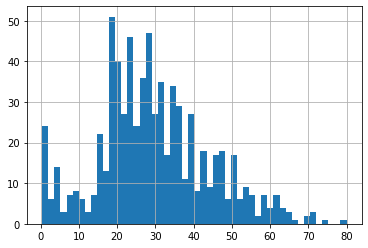

In [162]:
df['Age'].hist(bins=50)

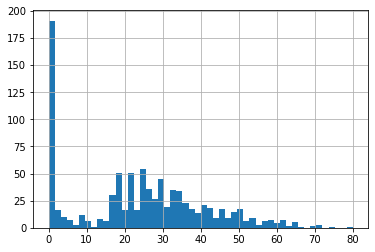

In [164]:
df['Age_zero'].hist(bins=50)

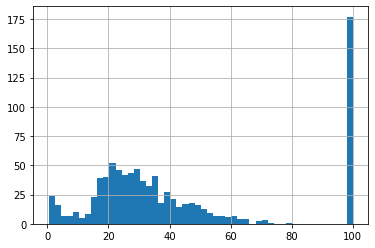

In [165]:
df['Age_hundred'].hist(bins=50)

 ###### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

###### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

### How To Handle Categroical Missing Values

#### 6. Frequent Category Imputation

In [171]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
print(df.shape)
df.head(10)

(1460, 4)


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [172]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [173]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

##### Compute the frequency with every feature

In [174]:
mode = df['GarageType'].value_counts().index[0]
mode

'Attchd'

In [176]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


###### Advantages
1. Easy To implement
2. Fater way to implement

###### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

### 7. Adding a variable to capture NAN

In [179]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [184]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [185]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


When we have more features, we will not add NaN variable bcz of curse of dimensionality

### 8. Replacing NaN with new category

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [195]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [196]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    df.drop(feature,axis=1,inplace=True)
df.head(15)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,Missing,Attchd
6,307000,Ex,Gd,Attchd
7,200000,Gd,TA,Attchd
8,129900,TA,TA,Detchd
9,118000,TA,TA,Attchd
